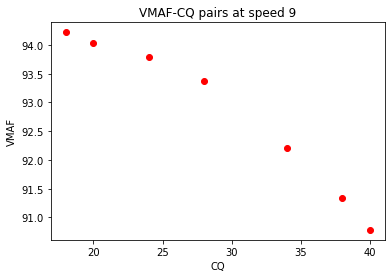

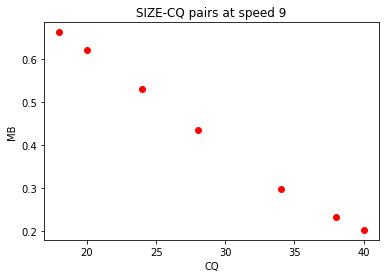

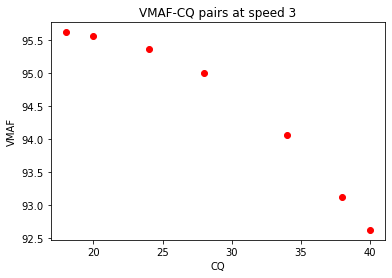

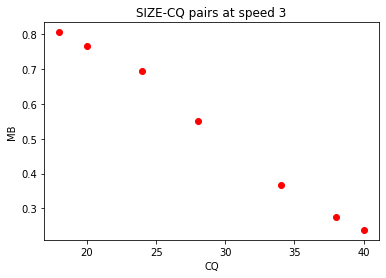

In [3]:
import json

from matplotlib import pyplot as plt


def draw_grapths(text):
    with open(text, "r") as outfile:
        yes = json.load(outfile)
    speed = yes[0][5]

    vmaf_values = [item[0] for item in yes]
    ssim_values = [item[4] for item in yes]
    cq_values = [item[3] for item in yes]
    size_values = [item[1] / 1000000 for item in yes]

    plt.figure()
    plt.plot(cq_values, vmaf_values, 'ro')
    plt.ylabel("VMAF")
    plt.xlabel("CQ")
    plt.title(f"VMAF-CQ pairs at speed {speed}")

    plt.figure()
    plt.plot(cq_values, size_values, 'ro')
    plt.ylabel("MB")
    plt.xlabel("CQ")
    plt.title(f"SIZE-CQ pairs at speed {speed}")

draw_grapths("/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/temp/convexHull/convexLog_test_speed_9.json")
draw_grapths("/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/temp/convexHull/convexLog_test_speed_3.json")


In [82]:
def get_data(text):
    with open(text, "r") as outfile:
        yes = json.load(outfile)
    speed = yes[0][5]

    vmaf_values = [item[0] for item in yes]
    ssim_values = [item[4] for item in yes]
    cq_values = [item[3] for item in yes]
    size_values = [item[1] / 1000000 for item in yes]

    return (vmaf_values, cq_values, size_values)

from sklearn.linear_model import LinearRegression

X = []
y = []

def append(url):
    vmaf_values, cq_values, size_values = get_data(url)
    global X
    global y
    y += cq_values
    for vmaf in vmaf_values:
        X += [[vmaf]]


model = LinearRegression()

append("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_0_speed_9.json")
append("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_1_speed_9.json")
append("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_2_speed_9.json")
append("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_3_speed_9.json")

model.fit(X, y)

y_new = model.predict([[70]])
print(y_new)

[25.59152794]


In [103]:
import tensorflow as tf
import os


def load_json(json, vmaf_arr, cq_arr):
    vmaf_values, cq_values, _ = get_data(json)
    vmaf_arr += vmaf_values
    cq_arr += cq_values

def get_model():

    # if os.path.exists("model.h5"):
        # Load the saved model
        # return tf.keras.models.load_model("model.h5")


    vmafs = []
    cqs = []
    load_json("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_0_speed_9.json", vmafs, cqs)
    load_json("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_1_speed_9.json", vmafs, cqs)
    load_json("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_2_speed_9.json", vmafs, cqs)
    load_json("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_3_speed_9.json", vmafs, cqs)
    load_json("/home/kokoniara/dev/VideoSplit/hoeEncode/ConvexHullEncoding/temp/convexHull/convexLog_test_speed_9.json", vmafs, cqs)

    print(vmafs)
    print(cqs)

    # Create a model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1,)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')


    # Fit the model to the data
    model.fit(vmafs, cqs, epochs=200)

    model.save("model.h5")
    return model

model = get_model()

vmaf_value = 95
# Predict a value of cq for a given vmaf value
predicted_cq = model.predict([vmaf_value])
print(predicted_cq)


1/1 [==============================] - 0s 41ms/step
[[25.631203]]


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

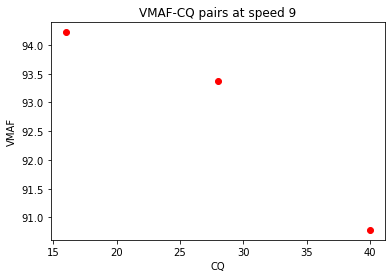

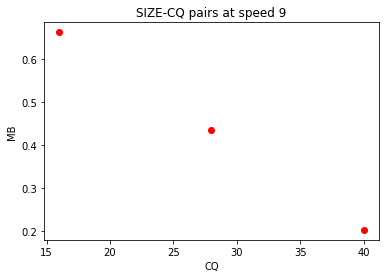

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

draw_grapths("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_test_speed_9.json")

from sklearn.linear_model import LinearRegression

X = []
y = []

def append(url):
    vmaf_values, cq_values, size_values = get_data(url)
    global X
    global y
    y += cq_values
    for vmaf in vmaf_values:
        X += [[vmaf]]

model = RandomForestRegressor(n_estimators=100, random_state=42)

append("/home/kokoniara/dev/VideoSplit/temp/convexHull/convexLog_test_speed_9.json")

model.fit(X, y)

y_new = model.predict([[98]])
print(y_new)

